<a href="https://colab.research.google.com/github/kellychan3/Titanic_Survival_Analysis/blob/main/Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🛳️ Titanic Survival Analysis**

---

## **Introduction**
**Purpose**: The goal of this project is to predict the survival of passengers aboard the Titanic using an Artificial Neural Network (ANN) model. The model aims to determine the likelihood that a passenger survived the disaster.

**Dataset Overview**: The dataset used in this project `TitanicSurvivalDataNumeric.pkl` contains cleaned and preprocessed numerical data derived from the original Titanic dataset. The target variable, “Survived”, indicates whether a passenger survived (1) or did not survive (0) the sinking of the Titanic.

**Feature Description**:
- Survive: Target variable indicating whether the passenger survived the Titanic disaster. 1 means the passenger survived and 0 means the passenger did not survive.
- Pclass: Passenger class (1st, 2nd, or 3rd), indicating socioeconomic status.
- Sex: Encoded gender of the passenger (0 = male, 1 = female).
- Age: Age of the passenger in years.
- SibSp: Number of siblings or spouses aboard the Titanic.
- Parch: Number of parents or children aboard the Titanic.
- Fare: Ticket fare paid by the passenger.
- Embarked_C: Encoded indicator for passengers who embarked at Cherbourg.
- Embarked_Q: Encoded indicator for passengers who embarked at Queenstown.
- Embarked_S: Encoded indicator for passengers who embarked at Southampton.

---

## **Import Library & Dataset**
Essential Python libraries such as Pandas and NumPy are imported to support data manipulation and numerical computations.

In [ ]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

TitanicSurvivalDataNumeric=pd.read_pickle('TitanicSurvivalDataNumeric.pkl')
TitanicSurvivalDataNumeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


---

## **Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) helps to understand the structure of the dataset and identify patterns that may influence customer churn.
- Objective: Explore and visualize key relationships and feature distributions to identify factors that distinguish passengers who survived from those who did not.

In [ ]:
TitanicSurvivalDataNumeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.3 KB


The dataset contains 891 records with 9 features and no missing values, ensuring data completeness for analysis.

In [ ]:
TitanicSurvivalDataNumeric.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.726061,0.523008,0.381594,32.204208,0.189675,0.087542,0.722783
std,0.486592,0.836071,0.477990,13.902353,1.102743,0.806057,49.693429,0.392264,0.282787,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.500000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


- Survived (mean = 0.38): Only about 38% of passengers survived, indicating that the majority did not make it through the disaster.
- Pclass (mean = 2.3): Passenger classes range from 1 to 3, with most passengers traveling in second or third class.
- Sex (mean = 0.65): With females encoded as 1, this indicates that the majority of passengers were women.
- Age (mean = 29.7): Passenger ages range from 0.4 to 80 years, with most passenger are middle-aged.
- SibSp (mean = 0.52): Number of siblings/spouses aboard ranges from 0 to 8, meaning most passengers traveled alone or with one companion.
- Parch (mean = 0.38): Number of parents/children aboard ranges from 0 to 6, suggesting that few passengers were accompanied by family dependents.
- Fare (mean = 32.2): Ticket fares vary widely from 0 to 512, reflecting significant differences in socioeconomic status among passengers.
- Embarked_C / Embarked_Q / Embarked_S: The averages show that most passengers boarded from Southampton (S), with smaller groups embarking from Cherbourg (C) and Queenstown (Q).

Count plots are used to examine class imbalance in the target variable.

<Axes: xlabel='Survived'>

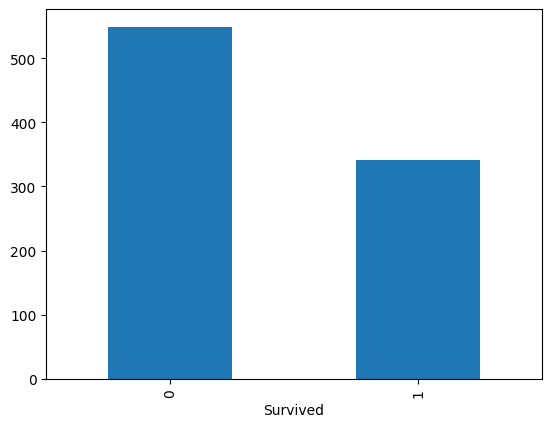

In [ ]:
TitanicSurvivalDataNumeric['Survived'].value_counts().plot(kind='bar')

- The target variable distribution shows that approximately 38% of passengers survived, while 62% did not.
- This indicates an imbalanced dataset, where passengers who did not survive significantly outnumber those who did.

Histograms reveal feature distributions.

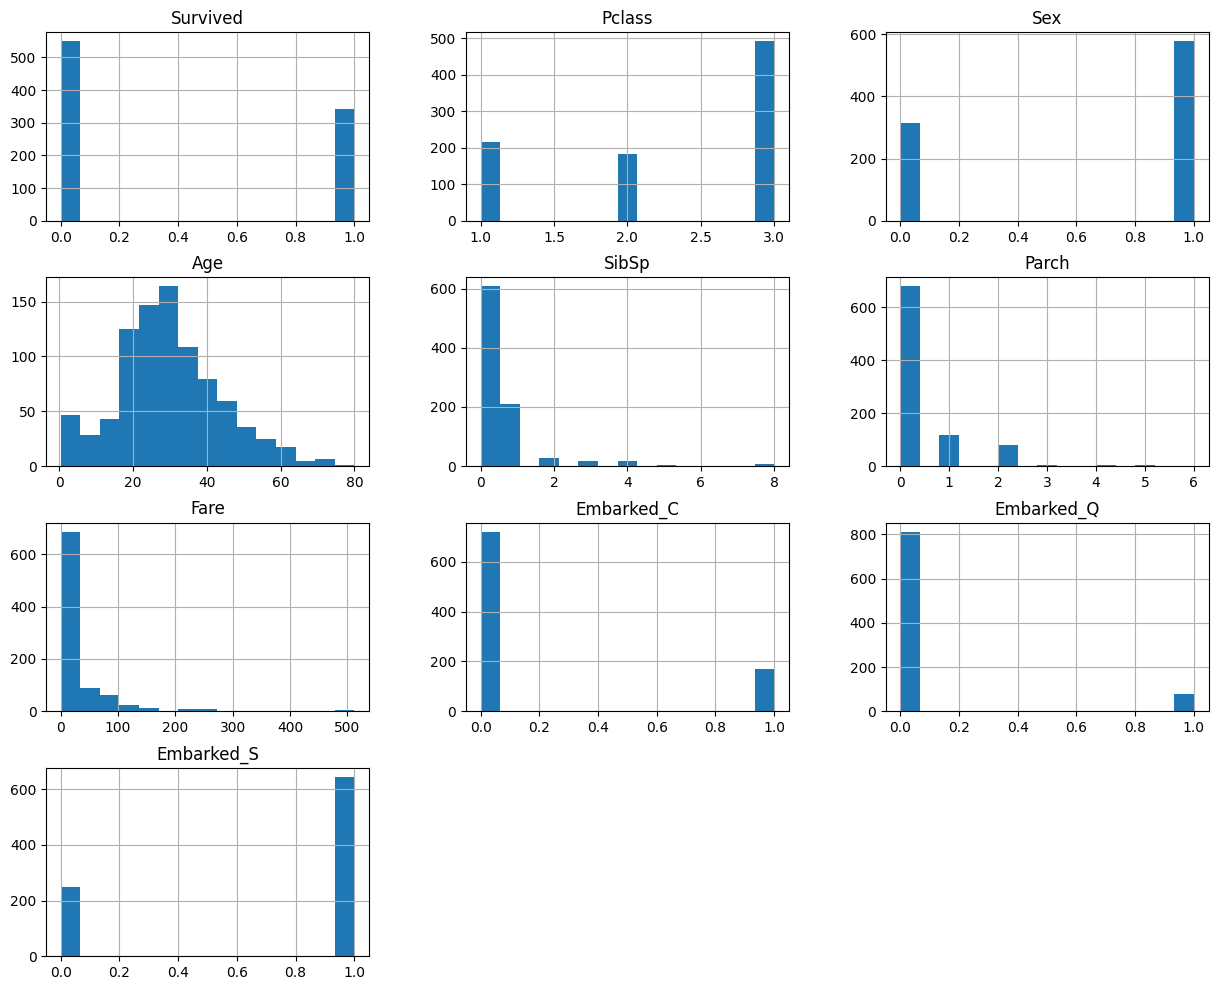

In [ ]:
TitanicSurvivalDataNumeric.hist(figsize = (15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

The correlation matrix shows the linear relationships between numerical features in the Titanic dataset.

Values range from -1 to +1, where:
- 1 indicates a perfect positive correlation (as one variable increases, the other also increases).
- -1 indicates a perfect negative correlation (as one increases, the other decreases).
- 0 means no linear correlation between variables.

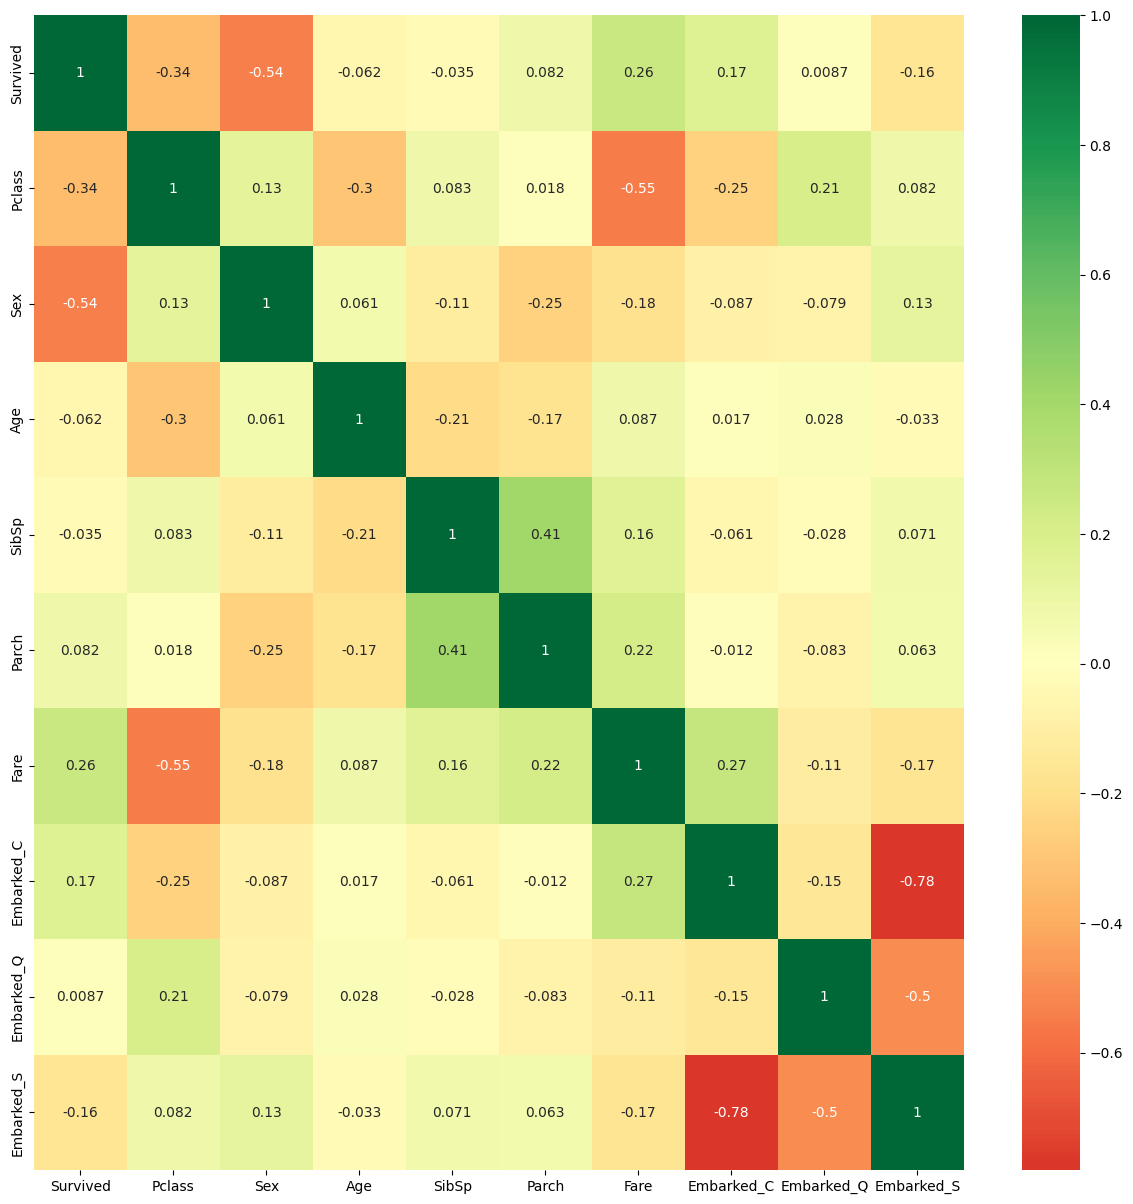

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
p = sns.heatmap(TitanicSurvivalDataNumeric.corr(), annot=True, cmap='RdYlGn', center=0)

Key Insights from the Heatmap
- Survived vs Pclass (-0.34) → Negative correlation shows that lower-class passengers (higher Pclass number) had lower survival rates.
- Survived vs Sex (-0.54) → Strong negative correlation means that female passengers (encoded as 1) were more likely to survive than males (0).
- Survived vs Age (-0.06) → Very weak negative correlation; age had little influence on survival probability.
- SibSp and Parch (0.41) → Moderate positive correlation; people traveling with siblings/spouses often also had parents/children on board, indicating family groups traveling together.
- Survived vs Fare (0.26) → Positive correlation suggests that passengers who paid higher fares (usually in higher classes) had higher chances of survival.
- Pclass and Fare (-0.55) → Strong negative correlation; first-class passengers paid much higher fares, while third-class paid the least.
- Embarked_C, Embarked_Q, Embarked_S → Strong negative correlations among these features (e.g., -0.78 between C and S) are expected since a passenger can embark from only one port, making these mutually exclusive categorical encodings.

---

## **Data Preparation**
The dataset is divided into features (X) and the target variable (y) to separate input variables from the output class (Survived).

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['Survived']
Predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = TitanicSurvivalDataNumeric[Predictors].values
y = TitanicSurvivalDataNumeric[TargetVariable].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

---

## **Model Building**
This step builds an Artificial Neural Network (ANN) using the Keras Sequential model with two hidden layers and a sigmoid output layer to predict passenger survival. The model uses the Adam optimizer and binary cross-entropy loss, trained for 10 epochs with a batch size of 10 to learn survival patterns from the training data.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
survivalANN_Model = classifier.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6168 - loss: 0.6903
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.6569
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6222 - loss: 0.5884
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - loss: 0.5304
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5989 - loss: 0.5415
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 0.5326
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.5050
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.5300
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.4939
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.5220


The training results show that the ANN model successfully learned from the data over 10 epochs:
- Accuracy improved from approximately 61% in the first epoch to about 80% by the tenth epoch, indicating that the model effectively captured survival patterns in the training data.
- Loss decreased from 0.69 to around 0.52, suggesting that the model’s prediction error reduced consistently during training.
- While the model shows improving accuracy (~80%), the relatively high loss suggests that predictions are not yet very confident or consistent. It may still be misclassifying some samples, especially those near the decision boundary.
- This is common in early training with limited epochs (only 10). Increasing the number of epochs, performing hyperparameter tuning, or adding regularization/dropout layers can help further reduce the loss and improve generalization.

---

## **Model Optimization / Hyperparameter Tuning**
This step aims to improve the ANN model’s performance by systematically experimenting with different hyperparameter combinations such as batch size and number of epochs.

A custom function `FunctionFindBestParams` iteratively trains the model across predefined parameter values and records the resulting training accuracies. The goal is to identify the combination that yields the highest accuracy and best convergence behavior, ensuring the model is optimally trained before final evaluation.

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

def FunctionFindBestParams(X_train, y_train):

    # Defining the list of hyper parameters to try
    TrialNumber = 0
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]

    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1

            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            # Fitting the model
            survivalANN_Model = classifier.fit(X_train, y_train, batch_size=batch_size_trial, epochs=epochs_trial, verbose=0)

            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]

            # Printing the results of the current iteration
            print(TrialNumber, 'Parameters:', 'batch_size:', batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', Accuracy)

            # Creating a new DataFrame for the current trial
            trial_data = pd.DataFrame(data=[[TrialNumber, 'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]], columns=['TrialNumber', 'Parameters', 'Accuracy'])

            # Concatenating the new trial data with the existing DataFrame
            SearchResultsData = pd.concat([SearchResultsData, trial_data], ignore_index=True)

    return SearchResultsData

ResultsData = FunctionFindBestParams(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8009631037712097


/tmp/ipython-input-1181304547.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  SearchResultsData = pd.concat([SearchResultsData, trial_data], ignore_index=True)


2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.8105939030647278
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.8378812074661255
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.8523274660110474
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.6292135119438171
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.80738365650177
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.8362760543823242
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.8426966071128845
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.7800962924957275
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.8202247023582458
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.8266452550888062
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.8507223129272461
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.7736757397651672
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.8105939030647278
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 0.8298555612564087
16 Pa

  TrialNumber            Parameters  Accuracy
3           4  batch_size5-epoch100  0.852327


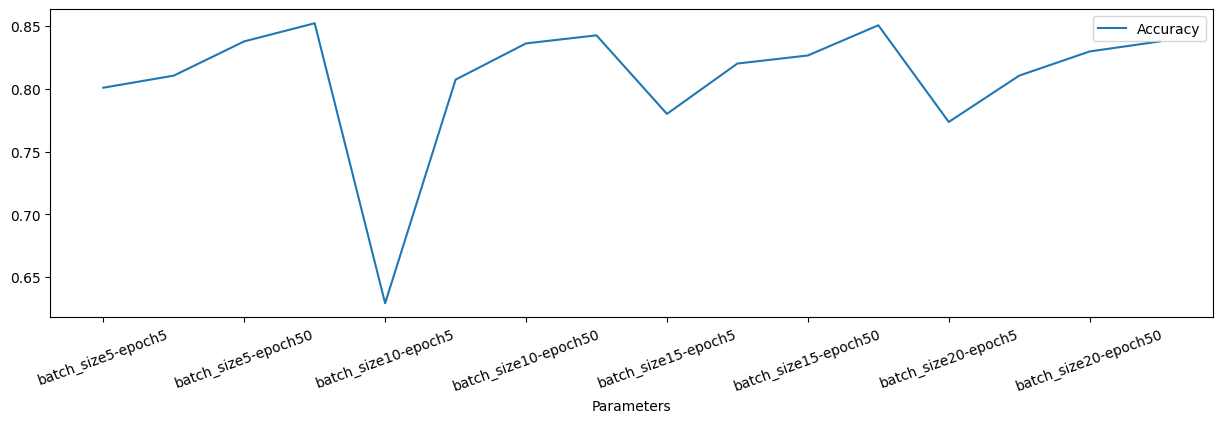

In [ ]:
import matplotlib.pyplot as plt

# Printing the best parameter
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))

# Visualizing the results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)
plt.show()

- Overall, accuracy improves as the number of epochs increases and smaller batch sizes (like 5 or 10) generally perform better.
- The best result was achieved with batch_size = 5 and epochs = 100 reaching about 85% accuracy, indicating this combination allows the model to learn most effectively.

In [ ]:
# Training the model with best hyperparamters
classifier.fit(X_train,y_train, batch_size=5 , epochs=100, verbose=1)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8143 - loss: 0.4405
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.4296
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8134 - loss: 0.4263
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8274 - loss: 0.4233
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.4126
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4492
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 0.4292
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8014 - loss: 0.4462
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3861
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4382
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8201 - loss: 0.4076
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━

---

## **Model Evaluation**
Model performance is evaluated on both training and test datasets to assess how well the model has learned from the data and how effectively it generalizes to unseen samples.

In [ ]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions

# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)

# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0     3.0  1.0  23.0    1.0    1.0  15.2458         1.0         0.0   
1     2.0  1.0  31.0    0.0    0.0  10.5000         0.0         0.0   
2     3.0  1.0  20.0    0.0    0.0   7.9250         0.0         0.0   
3     2.0  0.0   6.0    0.0    1.0  33.0000         0.0         0.0   
4     3.0  0.0  14.0    1.0    0.0  11.2417         1.0         0.0   

   Embarked_S  Survival  PredictedSurvivalProb  PredictedSurvival  
0         0.0         1               0.330476                  0  
1         1.0         0               0.168388                  0  
2         1.0         0               0.130837                  0  
3         1.0         1               0.535992                  1  
4         0.0         1               0.535992                  1  


In [ ]:
from sklearn import metrics
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



- The model achieves 81% accuracy on the test data.
- It predicts non-survivors (class 0) more reliably than survivors (class 1), with higher recall for class 0 (0.89 vs 0.68).
- Precision is balanced across classes, but the model tends to miss some survivors.
- Overall, the model performs reasonably well but could be improved in detecting survivors.

In [ ]:
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

[[140  17]
 [ 35  76]]


- True Positive (76): correctly predicted survivors.
- False Positive (17): predicted as survivors but did not survive.
- False Negative (35): predicted as non-survivors but actually survived.
- True Negative (140): correctly predicted non-survivors.

## **Conclusion**
The ANN model achieved **81% accuracy** on the test set. It predicts non-survivors more accurately than survivors, as shown by the higher recall for class 0 (0.89 vs 0.68). The confusion matrix indicates the model correctly identified 140 non-survivors and 76 survivors, while misclassifying 17 non-survivors as survivors and 35 survivors as non-survivors. Overall, the model performs well but could be improved in detecting survivors, potentially by adjusting thresholds, adding more training epochs or using additional features.